In [1]:
import nltk

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Task-1

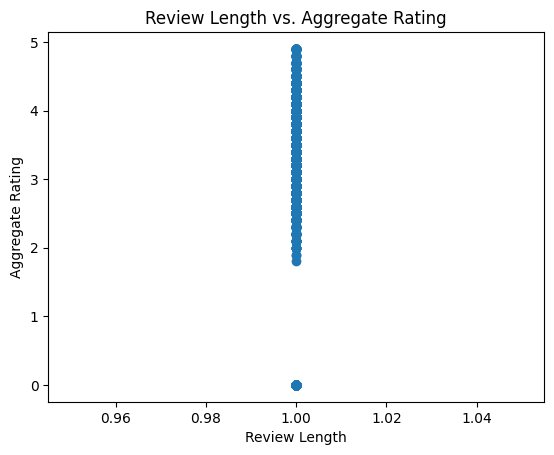

Most Common Positive Keywords: []
Most Common Negative Keywords: []
Average Review Length: 1.0


In [6]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
data = pd.read_csv('Dataset.csv')  # Replace 'Dataset.csv' with the actual file name

# Clean and preprocess text reviews
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic tokens
    tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords
    return tokens

data['Cleaned Reviews'] = data['Rating text'].apply(preprocess_text)

# Identify common positive and negative keywords
positive_keywords = Counter()
negative_keywords = Counter()

for index, row in data.iterrows():
    if row['Rating text'] == 'Positive':
        positive_keywords.update(row['Cleaned Reviews'])
    elif row['Rating text'] == 'Negative':
        negative_keywords.update(row['Cleaned Reviews'])

# Calculate average review length
data['Review Length'] = data['Cleaned Reviews'].apply(len)
average_review_length = data['Review Length'].mean()

# Explore relationship between review length and rating
plt.scatter(data['Review Length'], data['Aggregate rating'])
plt.xlabel('Review Length')
plt.ylabel('Aggregate Rating')
plt.title('Review Length vs. Aggregate Rating')
plt.show()

# Display results
print("Most Common Positive Keywords:", positive_keywords.most_common(10))
print("Most Common Negative Keywords:", negative_keywords.most_common(10))
print("Average Review Length:", average_review_length)


Task-2

Restaurant with Highest Votes:
    Restaurant Name  Votes  Aggregate rating
728            Toit  10934               4.8

Restaurant with Lowest Votes:
                 Restaurant Name  Votes  Aggregate rating
69              Cantinho da Gula      0               0.0
874                The Chaiwalas      0               0.0
879           Fusion Food Corner      0               0.0
880                Punjabi Rasoi      0               0.0
887                Baskin Robbin      0               0.0
...                          ...    ...               ...
9044               6 Packs Momos      0               0.0
9098                   Cafe' Wow      0               0.0
9099  Chef's Basket Pop Up Caf��      0               0.0
9103            The Hangout-Deli      0               0.0
9111                    Platters      0               0.0

[1094 rows x 3 columns]

Correlation between Votes and Rating: 0.31369058419541157


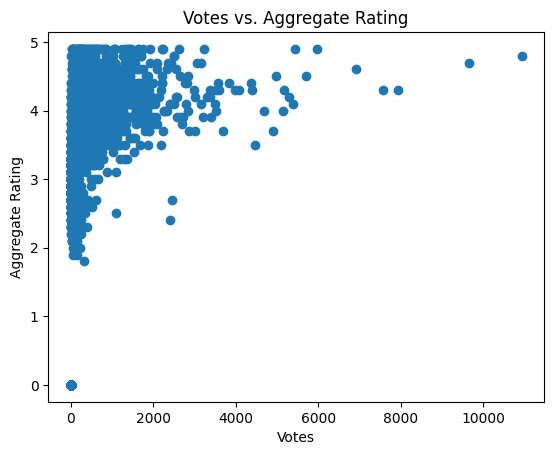

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
data = pd.read_csv('Dataset.csv')  # Replace 'Dataset.csv' with the actual file name

# Identify restaurants with highest and lowest votes
highest_votes_restaurant = data[data['Votes'] == data['Votes'].max()]
lowest_votes_restaurant = data[data['Votes'] == data['Votes'].min()]

# Analyze correlation between votes and rating
correlation = data['Votes'].corr(data['Aggregate rating'])

# Display results
print("Restaurant with Highest Votes:")
print(highest_votes_restaurant[['Restaurant Name', 'Votes', 'Aggregate rating']])

print("\nRestaurant with Lowest Votes:")
print(lowest_votes_restaurant[['Restaurant Name', 'Votes', 'Aggregate rating']])

print("\nCorrelation between Votes and Rating:", correlation)

# Scatter plot for correlation visualization
plt.scatter(data['Votes'], data['Aggregate rating'])
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.title('Votes vs. Aggregate Rating')
plt.show()


Task-3

In [8]:
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('Dataset.csv')  # Replace 'Dataset.csv' with the actual file name

# Extract the relevant columns
subset_data = data[['Price range', 'Has Online delivery', 'Has Table booking']]

# Create a cross-tabulation
cross_tab = pd.crosstab(subset_data['Price range'], [subset_data['Has Online delivery'], subset_data['Has Table booking']])

# Calculate percentages of online delivery and table booking by price range
percentage_table = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Display results
print("Cross-Tabulation: Price Range vs. Online Delivery and Table Booking")
print(cross_tab)
print("\nPercentages of Online Delivery and Table Booking by Price Range:")
print(percentage_table)


Cross-Tabulation: Price Range vs. Online Delivery and Table Booking
Has Online delivery    No        Yes     
Has Table booking      No  Yes    No  Yes
Price range                              
1                    3743    0   700    1
2                    1711  116  1163  123
3                     624  373   140  271
4                     299  234    13   40

Percentages of Online Delivery and Table Booking by Price Range:
Has Online delivery         No                   Yes           
Has Table booking           No        Yes         No        Yes
Price range                                                    
1                    84.225923   0.000000  15.751575   0.022502
2                    54.963058   3.726309  37.359460   3.951173
3                    44.318182  26.491477   9.943182  19.247159
4                    51.023891  39.931741   2.218430   6.825939
